In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('C:/Users/amous/Downloads/voice_bts.csv')
data = X.drop('contract_id', axis=1)  # Features (phone number attributes)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture

# Step 1: Load the Data
# data = pd.read_csv('C:/Users/amous/Downloads/voice_bts.csv')

# Step 2: Data Preprocessing
# Handle any necessary data preprocessing steps here, such as handling missing values

# Step 3: Prepare Data for Clustering
categorical_cols = data.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])


# Exclude 'dn' column from clustering
columns_for_clustering = [col for col in data.columns if col != 'dn']
X = data[columns_for_clustering].values


# Step 4: Apply Gaussian Mixture Models (GMM) Clustering

n_components = 3  # Number of clusters
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

# Step 5: Get Cluster Labels
labels = gmm.predict(X)

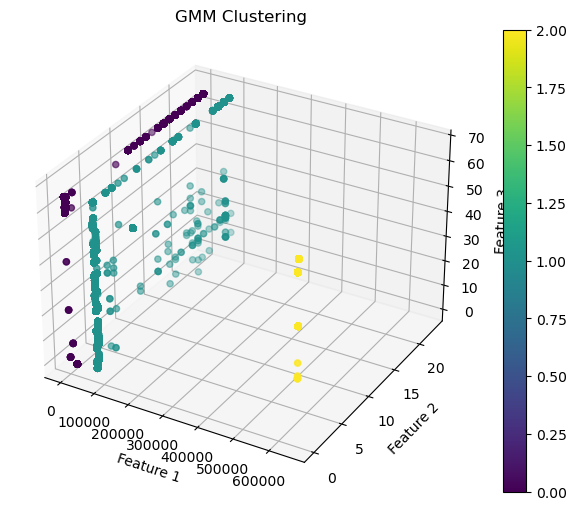

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Step 6: Visualization (assuming 3D data)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors indicating the clusters
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')

# Add a colorbar to show the cluster colors
cbar = plt.colorbar(scatter)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('GMM Clustering')

plt.show()

In [5]:
from sklearn.metrics import silhouette_score

# Step 6: Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.944754545420752
